In [6]:
# Import necessary library
import numpy as np
import matplotlib
from sklearn import svm 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import linear_model
import pandas

import matplotlib.pyplot as plt

In [2]:
"""
Load the data from the data base

Argument: No
Return:   Input: X
          Target: y
"""
def load_data():
    print('Loading data...\n')
    names = ['make','address','all','3d','our','over','remove','internet','order','mail','receive','will','people','report','addresses','free','bussiness','email','you','credit','your','font','000','money','hp','hpl','george','650','lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct','cs','meeting','original','project','re','edu','table','conference','semicolon','bracket','sqrbracket','excam','dollas','number','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']
    dataset = pandas.read_csv("spambase.data",names=names)
    X = dataset.iloc[:,0:57]
    y = dataset.spam
    print('Loaded...\n')
    dataset.info()
    return X, y

In [4]:
X, y = load_data()

Loading data...

Loaded...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
make                          4601 non-null float64
address                       4601 non-null float64
all                           4601 non-null float64
3d                            4601 non-null float64
our                           4601 non-null float64
over                          4601 non-null float64
remove                        4601 non-null float64
internet                      4601 non-null float64
order                         4601 non-null float64
mail                          4601 non-null float64
receive                       4601 non-null float64
will                          4601 non-null float64
people                        4601 non-null float64
report                        4601 non-null float64
addresses                     4601 non-null float64
free                          4601 non-null float64
bussiness                     460

Depth = 2; Accuracy: 0.871 (+/- 0.050)
Depth = 4; Accuracy: 0.908 (+/- 0.060)
Depth = 6; Accuracy: 0.918 (+/- 0.070)
Depth = 8; Accuracy: 0.925 (+/- 0.066)
Depth = 10; Accuracy: 0.929 (+/- 0.064)
Depth = 15; Accuracy: 0.932 (+/- 0.076)
Depth = 19; Accuracy: 0.932 (+/- 0.073)
Depth = 30; Accuracy: 0.931 (+/- 0.065)
Depth = 50; Accuracy: 0.929 (+/- 0.068)
Depth = 100; Accuracy: 0.929 (+/- 0.068)
Depth = 200; Accuracy: 0.929 (+/- 0.068)


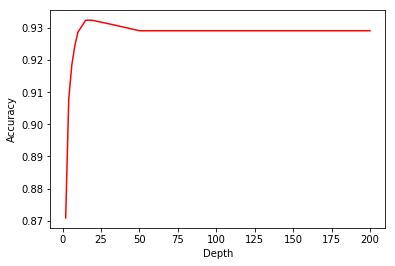

In [7]:
# List of depth for estimate
depth = np.array([2, 4, 6, 8, 10, 15, 19, 30, 50, 100, 200])
accuracyRDF = np.zeros((len(depth)))
for i in range (len(depth)):
    clfRDF = RandomForestClassifier(max_depth=depth[i], random_state=0)
    scoresRDF = cross_val_score(clfRDF, X, y, cv = 10)
    accuracyRDF[i] = scoresRDF.mean()
    print("Depth = %d; Accuracy: %0.3f (+/- %0.3f)" %(depth[i], scoresRDF.mean(), scoresRDF.std()*2))

plt.plot(depth, accuracyRDF,'r')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Depth = 2
Recall   : 0.710 (+/- 0.101)
Precision: 0.950 (+/- 0.074)
fscore   : 0.812 (+/- 0.079)
Accuracy : 0.871 (+/- 0.050)
Depth = 4
Recall   : 0.818 (+/- 0.081)
Precision: 0.942 (+/- 0.102)
fscore   : 0.875 (+/- 0.079)
Accuracy : 0.908 (+/- 0.060)
Depth = 6
Recall   : 0.854 (+/- 0.069)
Precision: 0.935 (+/- 0.121)
fscore   : 0.893 (+/- 0.088)
Accuracy : 0.918 (+/- 0.070)
Depth = 8
Recall   : 0.871 (+/- 0.083)
Precision: 0.935 (+/- 0.110)
fscore   : 0.901 (+/- 0.083)
Accuracy : 0.925 (+/- 0.066)
Depth = 10
Recall   : 0.881 (+/- 0.069)
Precision: 0.936 (+/- 0.112)
fscore   : 0.907 (+/- 0.079)
Accuracy : 0.929 (+/- 0.064)
Depth = 15
Recall   : 0.897 (+/- 0.089)
Precision: 0.931 (+/- 0.116)
fscore   : 0.913 (+/- 0.095)
Accuracy : 0.932 (+/- 0.076)
Depth = 19
Recall   : 0.900 (+/- 0.082)
Precision: 0.929 (+/- 0.115)
fscore   : 0.913 (+/- 0.091)
Accuracy : 0.932 (+/- 0.073)
Depth = 30
Recall   : 0.891 (+/- 0.073)
Precision: 0.933 (+/- 0.103)
fscore   : 0.911 (+/- 0.082)
Accuracy : 0.931 

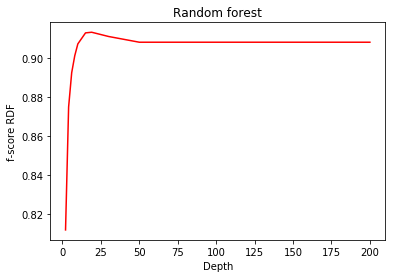

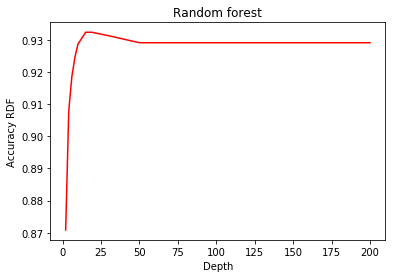

In [8]:
## =================================================================
# COMMITEE - RANDOM FOREST 
#=================================================================
scoring = ['precision', 'recall','f1','accuracy']
# List of depth for estimate
depth = np.array([2, 4, 6, 8, 10, 15, 19, 30, 50, 100, 200])
# Create zero arrays
k_fold = 10
precisionRDF = np.zeros((k_fold))
recallRDF = np.zeros((k_fold))
fscoreRDF = np.zeros((k_fold))
fscoreMeanRDF = np.zeros((len(depth)))
accuracyRDF = np.zeros((k_fold))
accuracyMeanRDF = np.zeros((len(depth)))
#Train 10-fold cross-validation
for i in range (len(depth)):
    clfRDF = RandomForestClassifier(max_depth=depth[i], random_state=0)
    scores = cross_validate(clfRDF, X, y, scoring=scoring,
                            cv=10, return_train_score=False)
    #Precision
    precisionRDF = scores['test_precision']
    #Recall
    recallRDF = scores['test_recall'] 
    #F-score
    #fscoreRDF = 2*np.multiply(precisionRDF,recallRDF)/(precisionRDF+recallRDF)
    fscoreRDF = scores['test_f1']
    fscoreMeanRDF[i] = fscoreRDF.mean()
    #Accuracy
    accuracyRDF = scores['test_accuracy'] 
    accuracyMeanRDF[i] = accuracyRDF.mean()
    print("Depth = %d" %(depth[i]))
    print("Recall   : %0.3f (+/- %0.3f)" %(recallRDF.mean(), recallRDF.std()*2))
    print("Precision: %0.3f (+/- %0.3f)" %(precisionRDF.mean(), precisionRDF.std()*2))
    print("fscore   : %0.3f (+/- %0.3f)" %(fscoreRDF.mean(), fscoreRDF.std()*2))
    print("Accuracy : %0.3f (+/- %0.3f)" %(accuracyRDF.mean(), accuracyRDF.std()*2))
plt.figure()
plt.plot(depth, fscoreMeanRDF,'r')
plt.xlabel('Depth')
plt.ylabel('f-score RDF')
plt.title('Random forest')
plt.show()
plt.figure()
plt.plot(depth, accuracyMeanRDF,'r')
plt.xlabel('Depth')
plt.ylabel('Accuracy RDF')
plt.title('Random forest')
plt.show()


C = 0
Recall   : 0.917 (+/- 0.051)
Precision: 0.731 (+/- 0.140)
fscore   : 0.811 (+/- 0.085)
Accuracy : 0.829 (+/- 0.102)
C = 0
Recall   : 0.872 (+/- 0.069)
Precision: 0.825 (+/- 0.182)
fscore   : 0.846 (+/- 0.119)
Accuracy : 0.871 (+/- 0.117)
C = 0
Recall   : 0.878 (+/- 0.073)
Precision: 0.882 (+/- 0.121)
fscore   : 0.879 (+/- 0.090)
Accuracy : 0.904 (+/- 0.076)
C = 0
Recall   : 0.886 (+/- 0.079)
Precision: 0.903 (+/- 0.108)
fscore   : 0.894 (+/- 0.083)
Accuracy : 0.917 (+/- 0.067)
C = 1
Recall   : 0.885 (+/- 0.080)
Precision: 0.905 (+/- 0.110)
fscore   : 0.894 (+/- 0.083)
Accuracy : 0.917 (+/- 0.067)
C = 10
Recall   : 0.881 (+/- 0.078)
Precision: 0.906 (+/- 0.110)
fscore   : 0.893 (+/- 0.081)
Accuracy : 0.916 (+/- 0.066)
C = 100
Recall   : 0.884 (+/- 0.081)
Precision: 0.891 (+/- 0.133)
fscore   : 0.886 (+/- 0.086)
Accuracy : 0.910 (+/- 0.073)
C = 1000
Recall   : 0.883 (+/- 0.081)
Precision: 0.891 (+/- 0.129)
fscore   : 0.886 (+/- 0.082)
Accuracy : 0.909 (+/- 0.069)
C = 10000
Recall  

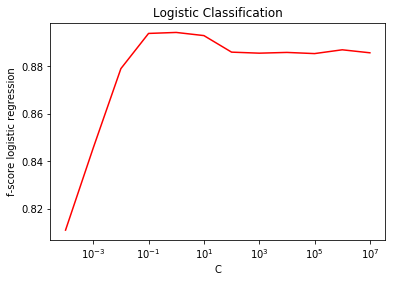

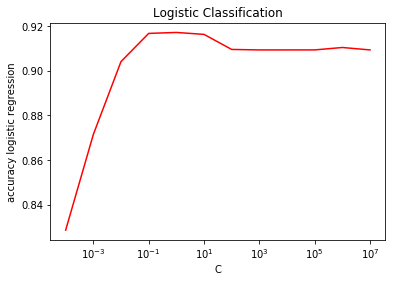

In [10]:
#=================================================================
# CANONICAL - LOGISTIC CLASSIFICATION 
#=================================================================
scoring = ['precision', 'recall','f1','accuracy']
# Regulating hyperparameter
C = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
# Create zero arrays
k_fold = 10
precisionLOG = np.zeros((k_fold))
recallLOG = np.zeros((k_fold))
fscoreLOG = np.zeros((k_fold))
fscoreMeanLOG = np.zeros((len(C)))
accuracyLOG = np.zeros((k_fold))
accuracyMeanLOG = np.zeros((len(C)))
#Train 10-fold cross-validation
for i in range (len(C)):
    clfLOG = linear_model.LogisticRegression(C=C[i])
    scores = cross_validate(clfLOG, X, y, scoring=scoring,
                            cv=10, return_train_score=False)
    #Precision
    precisionLOG = scores['test_precision']
    #Recall
    recallLOG = scores['test_recall'] 
    #F-score
    fscoreLOG = 2*np.multiply(precisionLOG,recallLOG)/(precisionLOG+recallLOG)
    fscoreMeanLOG[i] = fscoreLOG.mean()
    #Accuracy
    accuracyLOG = scores['test_accuracy'] 
    accuracyMeanLOG[i] = accuracyLOG.mean()
    print("C = %d" %(C[i]))
    print("Recall   : %0.3f (+/- %0.3f)" %(recallLOG.mean(), recallLOG.std()*2))
    print("Precision: %0.3f (+/- %0.3f)" %(precisionLOG.mean(), precisionLOG.std()*2))
    print("fscore   : %0.3f (+/- %0.3f)" %(fscoreLOG.mean(), fscoreLOG.std()*2))
    print("Accuracy : %0.3f (+/- %0.3f)" %(accuracyLOG.mean(), accuracyLOG.std()*2))

plt.figure()
plt.semilogx(C, fscoreMeanLOG,'r')
plt.xlabel('C')
plt.ylabel('f-score logistic regression')
plt.title('Logistic Classification')
plt.show()

plt.figure()
plt.semilogx(C, accuracyMeanLOG,'r')
plt.xlabel('C')
plt.ylabel('accuracy logistic regression')
plt.title('Logistic Classification')
plt.show()

In [ ]:
#=================================================================
# CANONICAL - SVM
#=================================================================
scoring = ['precision', 'recall','f1','accuracy']
# Regulating hyperparameter
C = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
# Create zero arrays
k_fold = 10
precisionSVM = np.zeros((k_fold))
recallSVM = np.zeros((k_fold))
fscoreSVM = np.zeros((k_fold))
fscoreMeanSVM = np.zeros((len(C)))
accuracySVM = np.zeros((k_fold))
accuracyMeanSVM = np.zeros((len(C)))

#Train 10-fold cross-validation
for i in range (len(C)):
    clfSVM = svm.SVC(kernel = 'linear', C=C[i] , max_iter = 100000)    
    scores = cross_validate(clfSVM, X, y, scoring=scoring,
                            cv=10, return_train_score=False)
    #Precision
    precisionSVM = scores['test_precision']
    #Recall
    recallSVM = scores['test_recall'] 
    #F-score
    fscoreSVM = 2*np.multiply(precisionSVM,recallSVM)/(precisionSVM+recallSVM)
    fscoreMeanSVM[i] = fscoreSVM.mean()
    #Accuracy
    accuracySVM = scores['test_accuracy'] 
    accuracyMeanSVM[i] = accuracyLOG.mean()
    print("C = %0.7d" %(C[i]))
    print("Recall   : %0.3f (+/- %0.3f)" %(recallSVM.mean(), recallSVM.std()*2))
    print("Precision: %0.3f (+/- %0.3f)" %(precisionSVM.mean(), precisionSVM.std()*2))
    print("fscore   : %0.3f (+/- %0.3f)" %(fscoreSVM.mean(), fscoreSVM.std()*2))
    print("Accuracy : %0.3f (+/- %0.3f)" %(accuracySVM.mean(), accuracySVM.std()*2))

plt.figure()
plt.semilogx(C, fscoreMeanSVM,'r')
plt.xlabel('C')
plt.ylabel('f-score SVM')
plt.title('Support vector machine')
plt.show()
plt.figure()
plt.semilogx(C, fscoreMeanSVM,'r')
plt.xlabel('C')
plt.ylabel('Accuracy SVM')
plt.title('Support vector machine')
plt.show()

In [ ]:
#==========================================================
# CANONICAL - NEURAL NETWORK
#==========================================================
scoring = ['precision', 'recall','f1','accuracy']
# Create zero arrays
k_fold = 10
precisionMLP = np.zeros((k_fold))
recallMLP = np.zeros((k_fold))
fscoreMLP = np.zeros((k_fold))
accuracyMLP = np.zeros((k_fold))
#MLP 
clfMLP = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=0.00001,
                           hidden_layer_sizes=(20,20,20), random_state=1)
scores = cross_validate(clfMLP, X, y, scoring=scoring,
                            cv=k_fold, return_train_score=False)
#Precision
precisionMLP = scores['test_precision']
#Recall
recallMLP = scores['test_recall'] 
#F-score
fscoreMLP = 2*np.multiply(precisionMLP,recallMLP)/(precisionMLP+recallMLP)
fscoreMeanMLP = fscoreMLP.mean()
#Accuracy
accuracyMLP = scores['test_accuracy'] 
print("Recall   : %0.3f (+/- %0.3f)" %(recallMLP.mean(), recallMLP.std()*2))
print("Precision: %0.3f (+/- %0.3f)" %(precisionMLP.mean(), precisionMLP.std()*2))
print("fscore   : %0.3f (+/- %0.3f)" %(fscoreMLP.mean(), fscoreMLP.std()*2))
print("Accuracy : %0.3f (+/- %0.3f)" %(accuracyMLP.mean(), accuracyMLP.std()*2))